# Filter_m

模拟传播1000次，画累积分布图

$F(m)=\sum_{s=1}^mp(s)$

In [2]:
WORKSPACEFOLDER = 'E:\Projects\ComplexNetwork'
import os
os.chdir(WORKSPACEFOLDER)

In [162]:
import config

DB = config.get_DB()

In [5]:
import json
import random

In [13]:
import numpy as np

In [64]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
import src.main.model.network as network
import src.main.util.network.algorithm as algorithm

In [4]:
times = 1000

## 通用代码

In [37]:
def main():
    # g_name, beta, mode
    with open(f'db/{g_name}/at.json', 'r') as fr:
        at = json.load(fr)
    g = network.DirectedGraph(g_name, at)
    
    sss = []
    ts = times // 10
    
    for i in range(10):
        
        if mode == 'sir':
            sub_at = g.bond_percolation(beta)

        elif mode == 'nsir':
            sub_at = g.n_bond_percolation(beta)

        nodes = random.sample(range(g.node_num), ts)
        for i in nodes:
            ss = algorithm.Algorithm.breadth_priority_traversal([i], sub_at)
            sss.append(len(ss))
    
    return sss

## DiSFNetwork4

In [169]:
mode = 'nsir'

In [ ]:
# g_name, beta = 'DiSF_b', 0.05
# g_name, beta = 'DiSF_a', 0.2
# g_name, beta = 'Twitter', 0.05
g_name, beta = 'Epinions', 0.2

sss = main()
sss_np = np.array(sss)
print(sss_np.mean(), sss_np.std())

In [246]:
x = list(range(1, 200))
y = []
for i in x:
    y.append(sss.count(i))
print(sum(y))

786


<IPython.core.display.Javascript object>


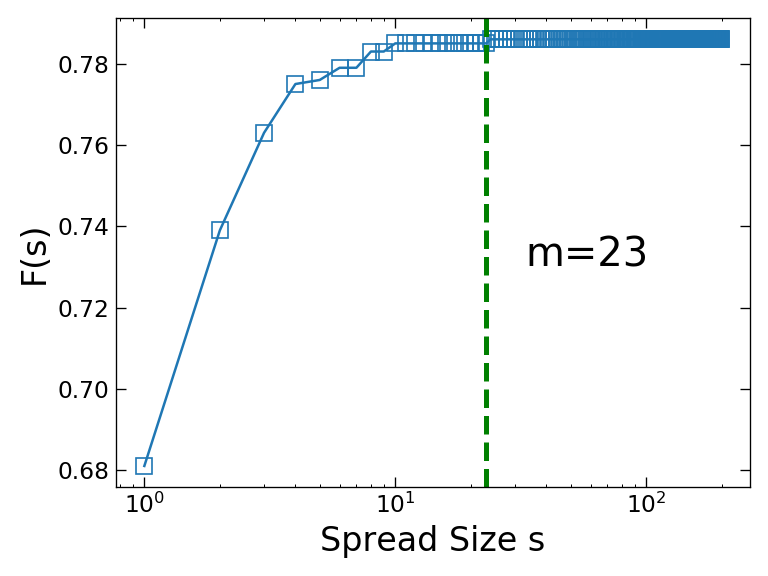

Text(0, 0.5, 'F(s)')

In [248]:
y = list(np.array(y).cumsum() / 1000)

fig, ax = plt.subplots()
ax.tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True)
ax.tick_params(labelsize=14, length=6)
ax.plot(x, y, 's-', mfc='None', ms=10)
ax.set_xscale('log')
ax.set_xlabel(r'Spread Size s', fontsize=20)
ax.set_ylabel(r'F(s)', fontsize=20)

In [258]:
m, y_p = 23, 0.73

In [259]:
del ax.lines[1], ax.texts[0]
ax.axvline(m, ls='--', c='g', lw=3)
ax.text(m + 10, y_p, f'm={m}', fontsize=24)

Text(33, 0.73, 'm=23')

In [260]:
fig.tight_layout()

In [261]:
data = {
    'x': x,
    'y': y
}
img_base_path = os.path.join(os.path.join(DB, g_name), 'img')
data_path = os.path.join(img_base_path, 'filter_m.json')
img_path = os.path.join(img_base_path, 'filter_m.png')
data_format.save_json(data_path, data)
fig.tight_layout()
fig.savefig(img_path)

In [160]:
import src.main.util.data_format as data_format

In [111]:
sss_np = np.array(sss)
sss_np.mean(), sss_np.std()

(690.68, 1320.6874140386135)

In [83]:
num_bins = 1000
bins = 10 ** np.linspace(0, np.log10(max(sss)), num_bins + 1)
hist, _ = np.histogram(np.array(sss), bins)
hist[0] += len(sss) - hist.sum()
# bins, hist

In [85]:
ax.plot(bins[:-1], hist, 'o-.', ms='16', lw=2, mfc='None')
ax.set_xscale('log')
ax.set_yscale('log')

<IPython.core.display.Javascript object>


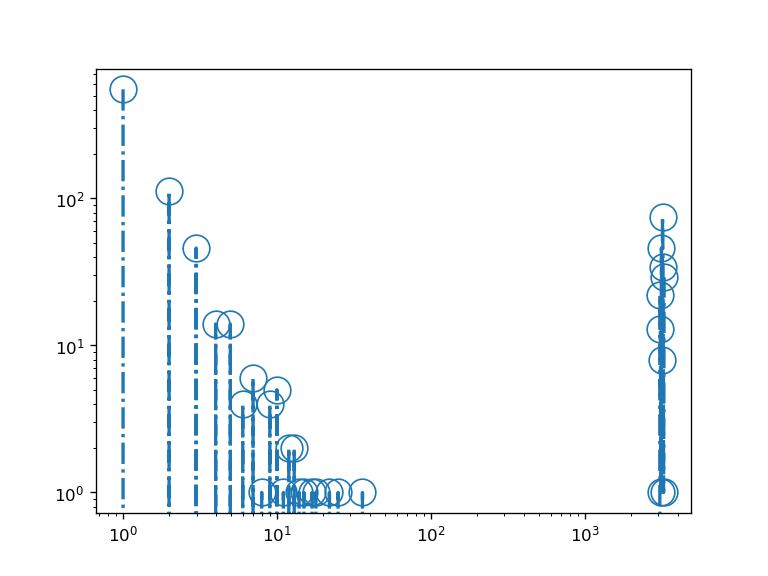

In [84]:
fig, ax = plt.subplots()

## DiSFNetwork20

In [103]:
g_name, beta, mode = 'DiSFNetwork20', 0.04, 'nsir'

In [104]:
sss = main()
sss_np = np.array(sss)
sss_np.mean(), sss_np.std()

(571.513, 1233.810403518709)

In [105]:
num_bins = 1000
bins = 10 ** np.linspace(0, np.log10(max(sss)), num_bins + 1)
hist, _ = np.histogram(np.array(sss), bins)
hist[0] += len(sss) - hist.sum()

In [106]:
ax.plot(bins[:-1], hist, 'o-.', ms='16', lw=2, mfc='None')
ax.set_xscale('log')
ax.set_yscale('log')

<IPython.core.display.Javascript object>


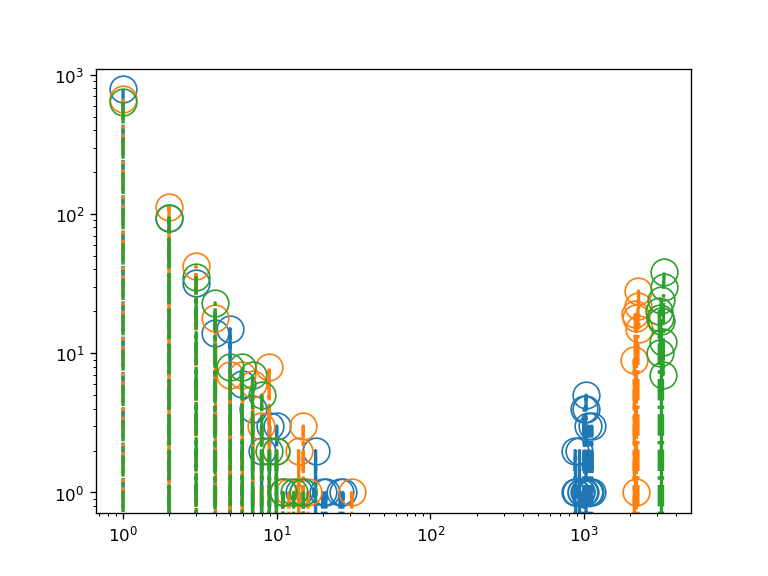

In [97]:
fig, ax = plt.subplots()